In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load and preprocess the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the network, loss function, and optimizer
net = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training the network
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()   # zero the parameter gradients

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Testing the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15593041.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 469756.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4258957.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10381759.55it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Epoch 1, Batch 100] loss: 1.426
[Epoch 1, Batch 200] loss: 0.524
[Epoch 1, Batch 300] loss: 0.387
[Epoch 1, Batch 400] loss: 0.360
[Epoch 1, Batch 500] loss: 0.307
[Epoch 1, Batch 600] loss: 0.293
[Epoch 1, Batch 700] loss: 0.254
[Epoch 1, Batch 800] loss: 0.237
[Epoch 1, Batch 900] loss: 0.225
[Epoch 2, Batch 100] loss: 0.192
[Epoch 2, Batch 200] loss: 0.203
[Epoch 2, Batch 300] loss: 0.193
[Epoch 2, Batch 400] loss: 0.176
[Epoch 2, Batch 500] loss: 0.154
[Epoch 2, Batch 600] loss: 0.180
[Epoch 2, Batch 700] loss: 0.180
[Epoch 2, Batch 800] loss: 0.176
[Epoch 2, Batch 900] loss: 0.163
[Epoch 3, Batch 100] loss: 0.137
[Epoch 3, Batch 200] loss: 0.143
[Epoch 3, Batch 300] loss: 0.140
[Epoch 3, Batch 400] loss: 0.128
[Epoch 3, Batch 500] loss: 0.130
[Epoch 3, Batch 600] loss: 0.128
[Epoch 3, Batch 700] loss: 0.123
[Epoch 3, Batch 800] loss: 0.117
[Epoch 3, Batch 900] loss: 0.130
[Epoch 4, Batch 100] loss: 0.102
[

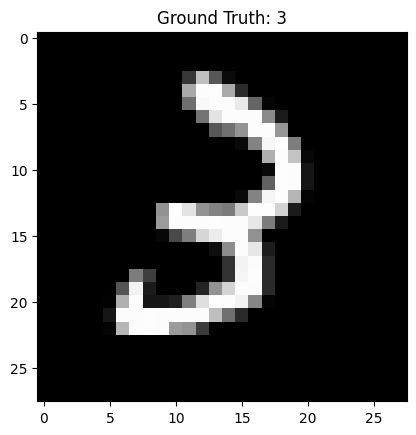

Predicted: 3


In [ ]:
import matplotlib.pyplot as plt

# Pick an image from the test set
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use the `next()` function

# Select the first image (you can change the index to pick another)
img = images[63]
label = labels[63]

# Display the image
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.title(f'Ground Truth: {label.item()}')
plt.show()

# Predict using the model
with torch.no_grad():
    img = img.unsqueeze(0)  # Add batch dimension
    output = net(img)
    _, predicted = torch.max(output.data, 1)
    print(f'Predicted: {predicted.item()}')
